# LE-Net:

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(300,300,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(300,300),batch_size=32,class_mode='categorical')

Found 402 images belonging to 2 classes.


In [14]:
test_set=test_datagen.flow_from_directory('Data/test',target_size=(300,300),batch_size=32,class_mode='categorical')

Found 126 images belonging to 2 classes.


In [15]:
from IPython.display import display

In [16]:
img_dims = 150
epochs = 30
batch_size = 32

In [17]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
12/12 [==============================] - 11s 939ms/step - loss: 0.8407 - accuracy: 0.4622 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 2/30
12/12 [==============================] - 8s 683ms/step - loss: 0.6889 - accuracy: 0.5459 - val_loss: 0.6874 - val_accuracy: 0.5938
Epoch 3/30
12/12 [==============================] - 8s 665ms/step - loss: 0.6729 - accuracy: 0.6297 - val_loss: 0.6784 - val_accuracy: 0.5104
Epoch 4/30
12/12 [==============================] - 8s 693ms/step - loss: 0.6443 - accuracy: 0.6432 - val_loss: 0.6930 - val_accuracy: 0.5833
Epoch 5/30
12/12 [==============================] - 8s 682ms/step - loss: 0.6521 - accuracy: 0.6054 - val_loss: 0.6919 - val_accuracy: 0.5417
Epoch 6/30
12/12 [==============================] - 8s 695ms/step - loss: 0.6271 - accuracy: 0.6622 - val_loss: 0.6349 - val_accuracy: 0.5312
Epoch 7/30
12/12 [==============================] - 8s 690ms/step - los

In [19]:
import h5py

In [20]:
Classifier.save('Casting.h5')

In [21]:
from keras.models import load_model

In [22]:
model=load_model('Casting.h5')

In [23]:
import numpy as np

In [24]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('ok1.jpeg',target_size=(300,300))

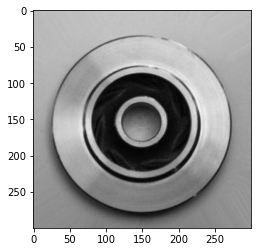

In [25]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [26]:
test_image=image.img_to_array(test_image)

In [27]:
test_image=np.expand_dims(test_image,axis=0)

In [28]:
result=model.predict(test_image)

In [29]:
prediction = result[0]

In [30]:
classes=training_set.class_indices

In [31]:
classes

{'def_front': 0, 'ok_front': 1}

In [32]:
prediction=list(prediction)

In [33]:
prediction

[0.0, 1.0]

In [34]:
classes=['def_front','ok_front']

In [35]:
output=zip(classes,prediction)

In [36]:
output=dict(output)

In [37]:
output

{'def_front': 0.0, 'ok_front': 1.0}

In [38]:
if output['def_front']==1.0 :
    print("Different in Front")
elif output['ok_front']==1.0:
    print("Good condition")

Good condition
